In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df=pd.read_csv(r"C:\Users\ASUS\Desktop\PRODIGY\titanic\train.csv")
test_df=pd.read_csv(r"C:\Users\ASUS\Desktop\PRODIGY\titanic\test.csv")

In [16]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [3]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
test_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [5]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())

In [8]:
test_df['Age']=test_df['Age'].fillna(test_df['Age'].median())

In [9]:
print(test_df['Age'].isnull().sum())
print(train_df['Age'].isnull().sum())

0
0


In [10]:
train_df['Embarked'].dtypes

dtype('O')

In [11]:
train_df['Embarked']=train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

In [12]:
test_df['Fare']=test_df['Fare'].fillna(test_df['Fare'].median())

In [18]:
train_df.drop(columns=['Cabin'], inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)

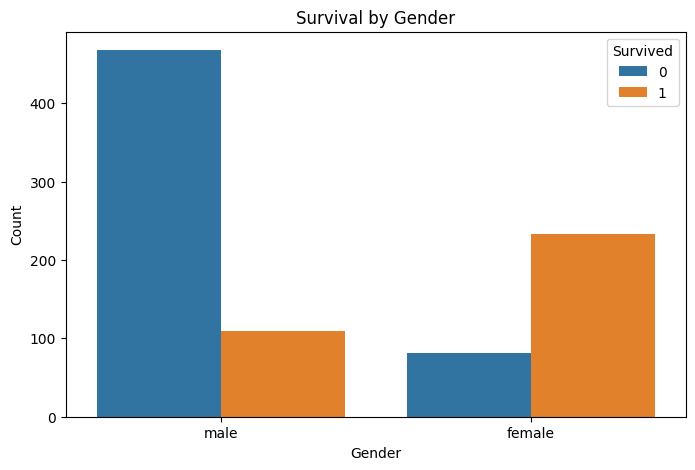

In [20]:
# Data Visualization (EDA) - Train Data
# 1. Survival by Gender
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='Sex', hue='Survived')
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

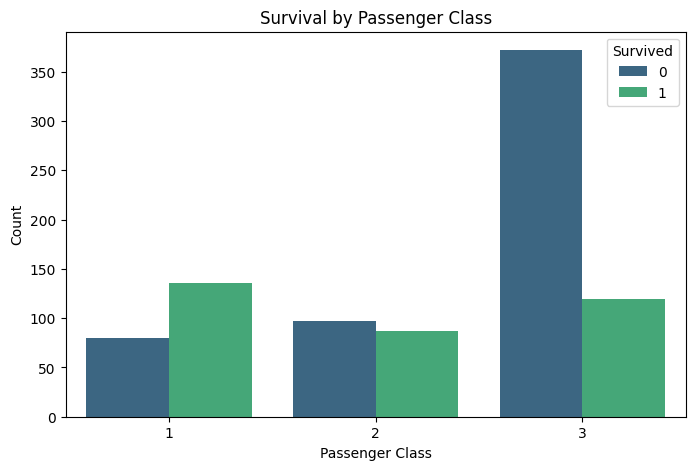

In [22]:
# 2. Survival by Passenger Class
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='Pclass', hue='Survived', palette='viridis')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

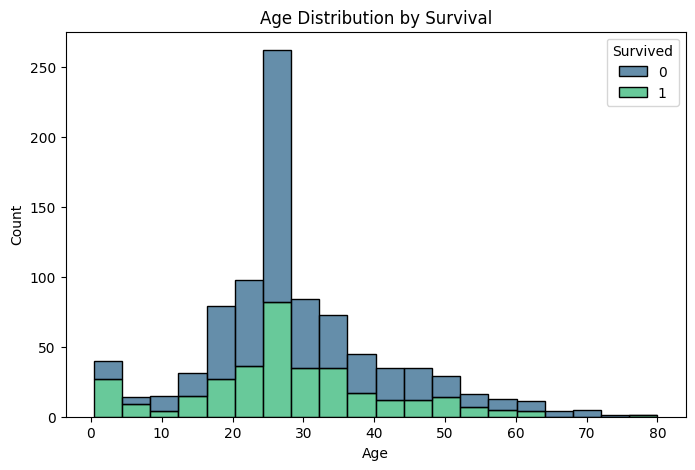

In [25]:
#Age Distribution by Survival
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='Age', hue='Survived', multiple='stack', palette='viridis', bins=20)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [34]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

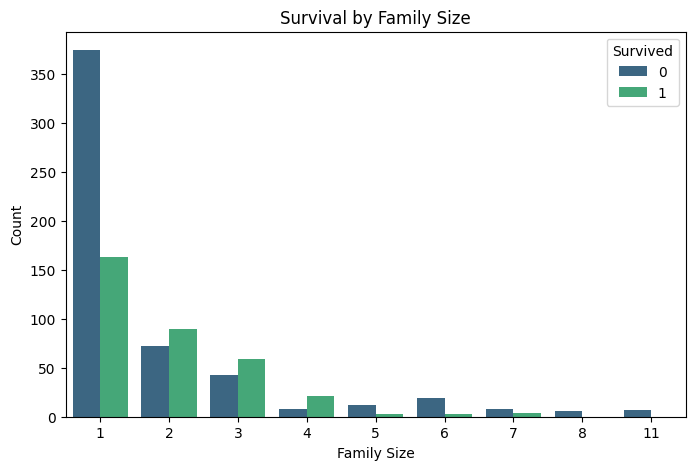

In [35]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='FamilySize', hue='Survived', palette='viridis')
plt.title('Survival by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()


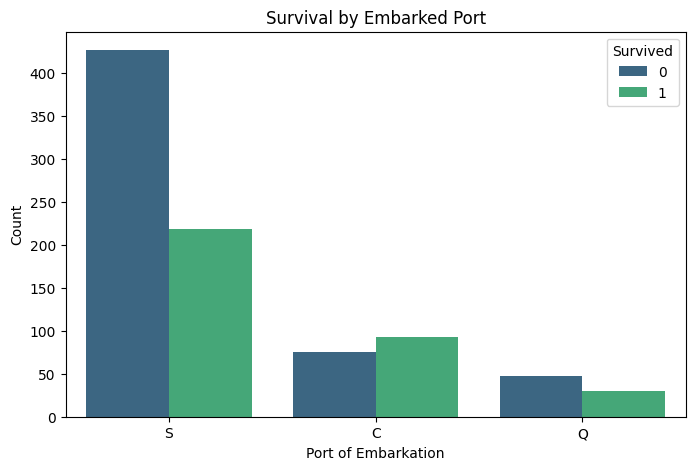

In [39]:
# 6. Survival by Embarked
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='Embarked', hue='Survived', palette='viridis')
plt.title('Survival by Embarked Port')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

In [60]:
train_df['Title'] = train_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_df['Title'] = test_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [61]:
# Group rare titles into 'Rare'
rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Sir', 'Capt', 'Countess', 'Jonkheer', 'Don']
train_df['Title'] = train_df['Title'].replace(rare_titles, 'Rare')
test_df['Title'] = test_df['Title'].replace(rare_titles, 'Rare')

In [62]:
train_df['Title'] = train_df['Title'].replace(['Mlle', 'Ms'], 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')

In [63]:
test_df['Title'] = test_df['Title'].replace(['Mlle', 'Ms'], 'Miss')
test_df['Title'] = test_df['Title'].replace('Mme', 'Mrs')

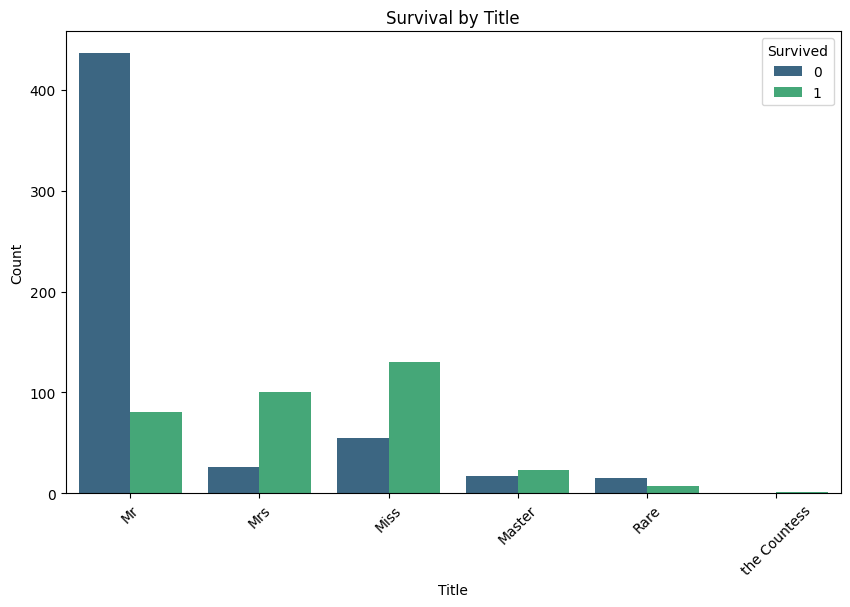

In [71]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Title', hue='Survived', palette='viridis')
plt.title('Survival by Title')
plt.xlabel('Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [77]:
# Crosstab analysis: Survival by Passenger Class and Gender
crosstab_result = pd.crosstab([train_df['Pclass'], train_df['Sex']], train_df['Survived'], margins=True)
print(crosstab_result)

Empty DataFrame
Columns: []
Index: []


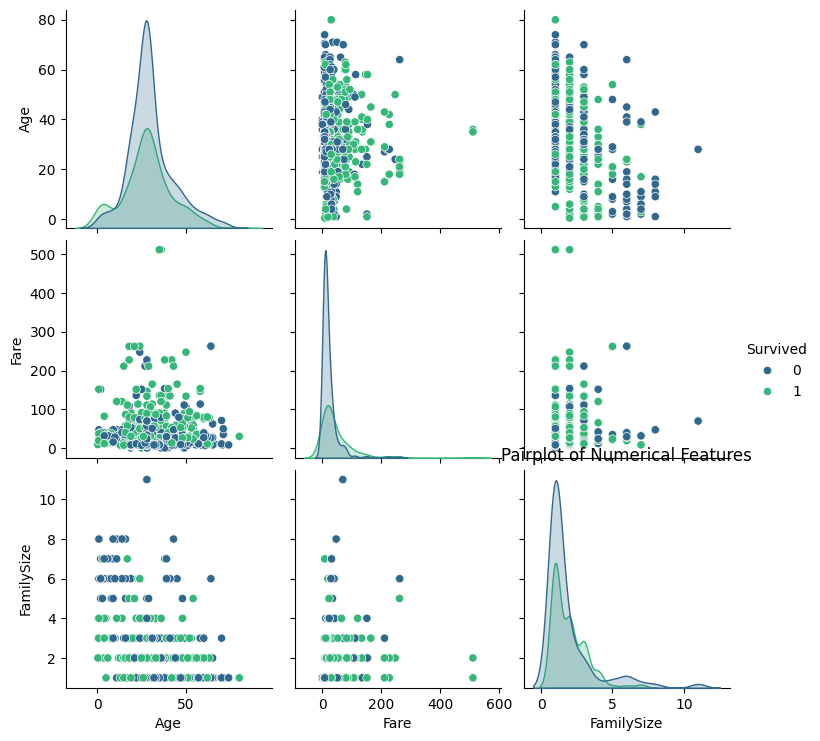

In [73]:
# Pairplot of numerical features to explore their relationship with survival
sns.pairplot(train_df[['Survived', 'Age', 'Fare', 'FamilySize']], hue='Survived', palette='viridis')
plt.title('Pairplot of Numerical Features')
plt.show()

In [78]:
# Conclusion
print("\nConclusion:")
print("1. Gender and Passenger Class have a strong influence on survival, with females and first-class passengers having higher chances.")
print("2. Younger passengers, especially children, have higher survival rates.")
print("3. Family size plays a role, with smaller families having better survival chances.")
print("4. Higher fares are linked with higher survival rates, likely due to class and socio-economic status.")
print("5. Port of embarkation affects survival, with passengers from Cherbourg (C) having better chances.")


Conclusion:
1. Gender and Passenger Class have a strong influence on survival, with females and first-class passengers having higher chances.
2. Younger passengers, especially children, have higher survival rates.
3. Family size plays a role, with smaller families having better survival chances.
4. Higher fares are linked with higher survival rates, likely due to class and socio-economic status.
5. Port of embarkation affects survival, with passengers from Cherbourg (C) having better chances.
